In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

In [4]:
pd.set_option('display.max_columns', 100)

In [5]:
path = r"C:\Users\Asus\Downloads\coaster_db.csv"

In [6]:
df = pd.read_csv(path)

In [7]:
df.head(5)

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,gravity,NaN,NaN,Coney Island Cyclone Site,1:00,1600 riders per hour,2.9,LaMarcus Adna Thompson,30°,43 ft (13 m),NaN,NaN,NaN,Gravity pulled coaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 1 across in ...,NaN,NaN,NaN,12,Lina Beecher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 2 across in ...,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,Switchback Railway,NaN,NaN,NaN,1910,NaN,Giant Racer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


## Data Cleaning

In [8]:
df.shape

(1087, 56)

In [9]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [10]:
df.dtypes

coaster_name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Opening date                      object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                       float64
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane available               object
Replaced        

In [11]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


In [12]:
df = df[['coaster_name',
    #'Length', 'Speed', 
    'Location', 'Status', 
    #'Opening date',
    #'Type', 
    'Manufacturer', 
    #'Height restriction', 'Model', 'Height',
    #'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
    #'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
    #'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
    #'Track layout', 'Fastrack available', 'Soft opening date.1',
    #'Closing date', 
    'Opened', 
    #'Replaced by', 'Website',
    # Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
    #'Single rider line available', 'Restraint Style',
    #'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
    'year_introduced', 'latitude', 'longitude', 'Type_Main',
    'opening_date_clean', 
    #'speed1', 'speed2', 'speed1_value', 'speed1_unit',
    'speed_mph', 
    #'height_value', 'height_unit', 
    'height_ft','Inversions_clean', 'Gforce_clean']].copy()

In [13]:
df.shape

(1087, 14)

In [14]:
df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean'])

In [15]:
df.dtypes


coaster_name                  object
Location                      object
Status                        object
Manufacturer                  object
Opened                        object
year_introduced                int64
latitude                     float64
longitude                    float64
Type_Main                     object
opening_date_clean    datetime64[ns]
speed_mph                    float64
height_ft                    float64
Inversions_clean               int64
Gforce_clean                 float64
dtype: object

In [16]:
df.columns

Index(['coaster_name', 'Location', 'Status', 'Manufacturer', 'Opened',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed_mph', 'height_ft', 'Inversions_clean',
       'Gforce_clean'],
      dtype='object')

In [17]:
df = df.rename(columns={
    'coaster_name':'Coaster_Name',
    'year_introduced': 'Year_Introduced',
    'opening_date_clean': 'Opening_Date_Clean',
    'latitude': 'Latitude',
    'longitude': 'Longitude',
    'speed_mph': 'Speed_Mph',
    'height_ft': 'Height_Ft',
    'Gforce_clean':'Gforce'
})

In [18]:
df.isna().sum()

Coaster_Name             0
Location                 0
Status                 213
Manufacturer            59
Opened                1060
Year_Introduced          0
Latitude               275
Longitude              275
Type_Main                0
Opening_Date_Clean     250
Speed_Mph              150
Height_Ft              916
Inversions_clean         0
Gforce                 725
dtype: int64

In [19]:
df = df.loc[~df.duplicated(subset=['Coaster_Name','Location','Opening_Date_Clean'])] \
    .reset_index(drop=True).copy()

In [20]:
#Checking a duplicate
#df.query('Coaster_Name == "Crystal Beach Cyclone"')
df

,Coaster_Name,Location,Status,Manufacturer,Opened,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date_Clean,Speed_Mph,Height_Ft,Inversions_clean,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1895,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,Ice Breaker (roller coaster),SeaWorld Orlando,Under construction,Premier Rides,NaN,2022,28.4088,-81.4633,Steel,2022-02-01,52.0,NaN,0,NaN
986,Leviathan (Sea World),Sea World,Under construction,Martin & Vleminckx,NaN,2022,-27.9574,153.4263,Wood,2022-01-01,49.7,105.0,0,NaN
987,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,NaN,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
988,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,NaN,2022,NaN,NaN,Steel,NaT,34.0,NaN,0,NaN


# Data Exploration

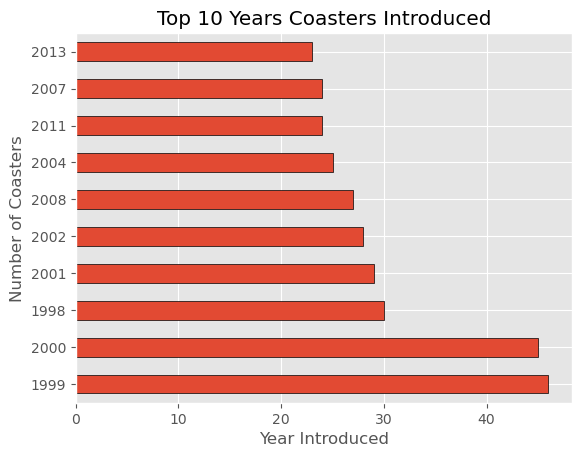

In [21]:
ax = df['Year_Introduced'].value_counts() \
    .head(10) \
    .plot(kind='barh', title='Top 10 Years Coasters Introduced', edgecolor='black')
ax.set_xlabel('Year Introduced')
ax.set_ylabel('Number of Coasters')

plt.show()

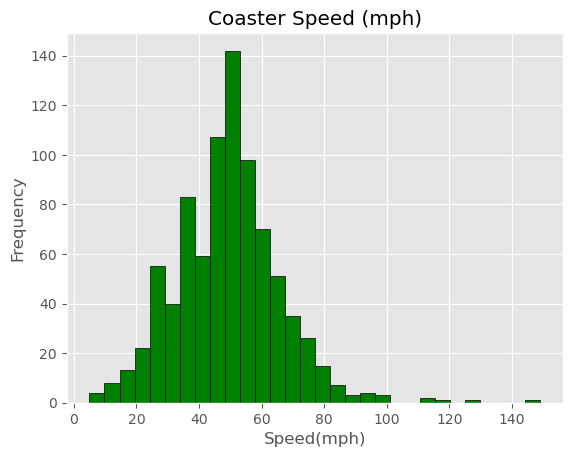

In [22]:
ax = df['Speed_Mph'].plot(kind='hist', 
                          bins=30,
                          color='green', 
                          edgecolor='black',
                         title='Coaster Speed (mph)',
                         )
ax.set_xlabel('Speed(mph)')
plt.show()

## Feature Relationship

### Scatterplot

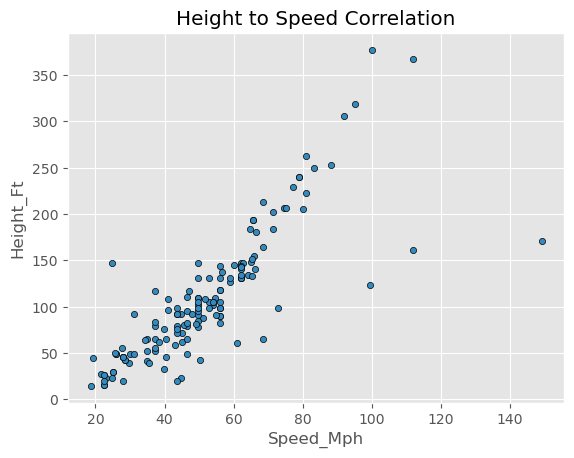

In [23]:
df.plot(kind='scatter', 
        x='Speed_Mph', 
        y='Height_Ft',
        title='Height to Speed Correlation',
        edgecolor='black'
        )
plt.show()

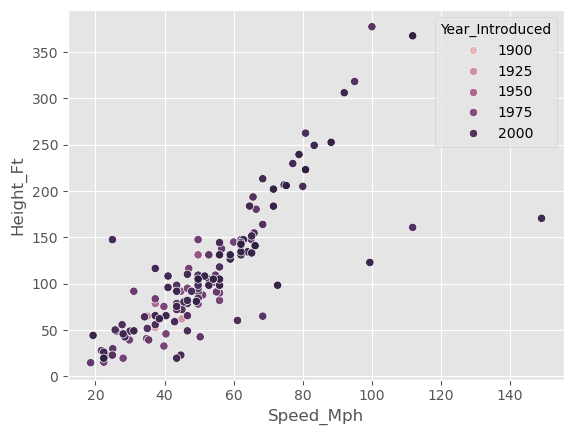

In [24]:
sns.scatterplot(x='Speed_Mph',
                y='Height_Ft',
                hue = 'Year_Introduced',
                data = df)
plt.show()

### Pair Plots

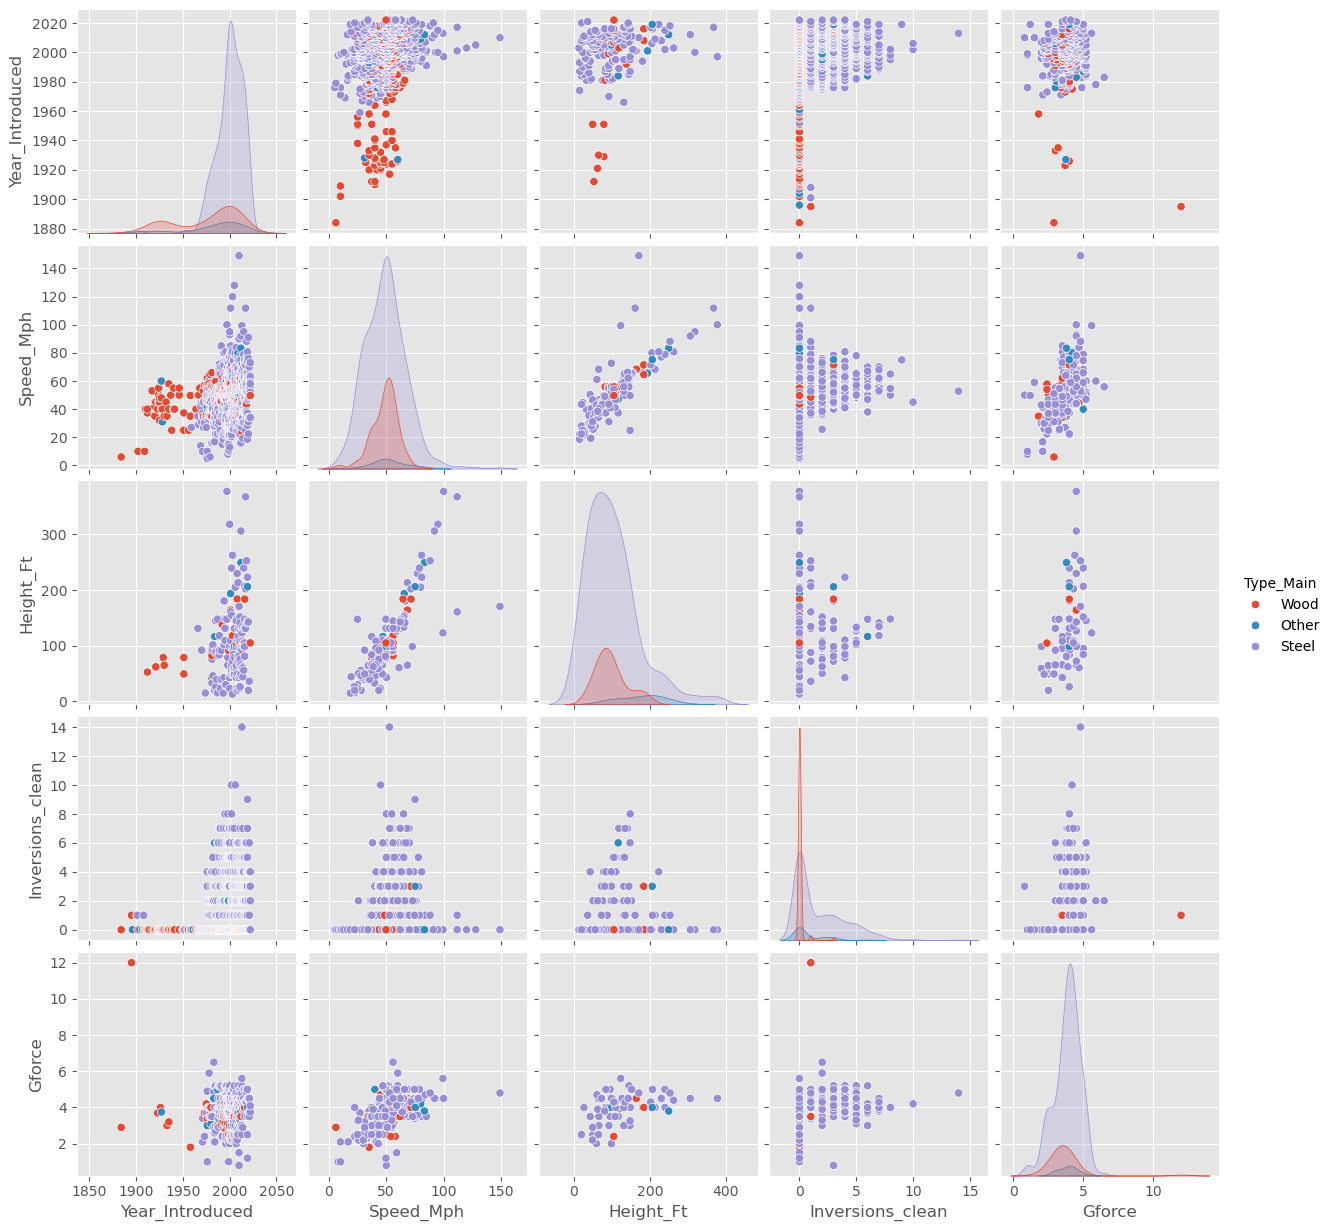

In [25]:
sns.pairplot(df, vars=['Year_Introduced', 'Speed_Mph','Height_Ft', 'Inversions_clean','Gforce'],
            hue='Type_Main'
            )
plt.show()

In [26]:
df_corr = df[['Year_Introduced', 'Speed_Mph','Height_Ft', 'Inversions_clean','Gforce']].dropna().corr()

### Heatmap of Correlations

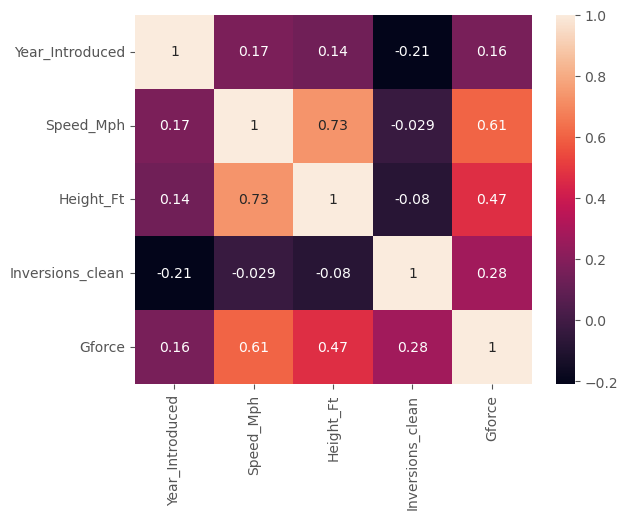

In [27]:
sns.heatmap(df_corr, annot=True)
plt.show()

# Question

What are the locations with the fastest roller coasters (minimum of 10)?

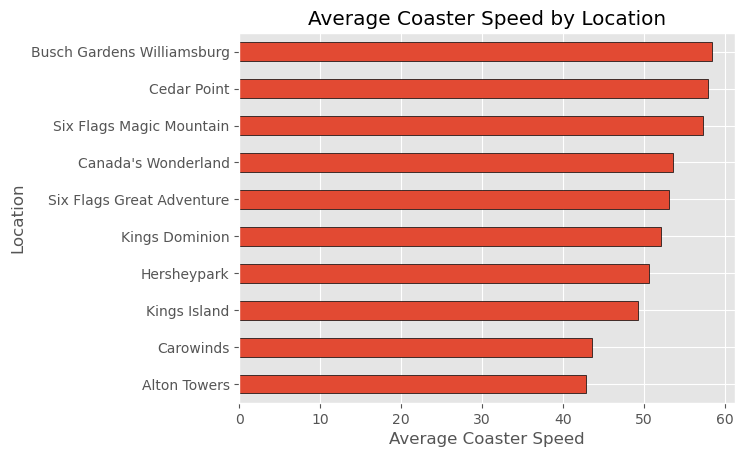

In [28]:
ax = df.query('Location != "Other"') \
    .groupby('Location')['Speed_Mph'] \
    .agg(['mean','count']) \
    .query('count >= 10') \
    .sort_values('mean')['mean'] \
    .plot(kind='barh', title='Average Coaster Speed by Location', edgecolor = 'black')

ax.set_xlabel('Average Coaster Speed')
plt.show()

# Statistical Tests

## T Test
- Are Steel coasters significantly faster than wooden coasters?

In [29]:
from scipy import stats

In [36]:
steel = df[df['Type_Main'] == 'Steel']['Speed_Mph'].dropna()
wood = df[df['Type_Main'] == 'Wood']['Speed_Mph'].dropna()


t_stat, p_val = stats.ttest_ind(steel, wood)

print(f"T Statistics: {t_stat:.2f}")
print(f"P value: {p_val:.4f}")


if p_val < 0.05:
    print("Result: Steel Coasters are significantly faster than Wooden coasters")
else:
    print("Result: No significant difference")

T Statistics: 0.42
P value: 0.6775
Result: No significant difference


## Correlation Analysis

- How strongly does the G-Force influence the speed of the coaster?

In [50]:
subset = df[['Gforce', 'Speed_Mph']].dropna().reset_index(drop=True)
print(f"Analyzing {len(subset)} out of {len(df)} coasters")

corr_coeff, p_value = stats.pearsonr(subset['Gforce'], subset['Speed_Mph'])
print(f"Correlation: {corr_coeff:.2f} (p={p_value:.4f})")

Analyzing 321 out of 990 coasters
Correlation: 0.50 (p=0.0000)


In [54]:
subset2 = df[['Gforce', 'Height_Ft']].dropna().reset_index(drop=True)
corr_height, p_height = stats.pearsonr(subset2['Gforce'], subset2['Height_Ft'])

print("Speed vs G-force:  r = 0.50")
print(f"Height vs G-force: r = {corr_height:.2f} (p={p_height:.4f})")

if abs(corr_height) > 0.50:
    print("Result: Height is a stronger predictor of G-force than speed")
else:
    print("Result: Speed is a better predictor than height")

Speed vs G-force:  r = 0.50
Height vs G-force: r = 0.48 (p=0.0000)
Result: Speed is a better predictor than height


## Linear Regression

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

data = df[['Speed_Mph', 'Height_Ft', 'Gforce']].dropna()

X = data[['Speed_Mph', 'Height_Ft']]
y = data['Gforce']

# Train model
model = LinearRegression()
model.fit(X, y)

# Evaluate
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
rmse = mean_squared_error(y, y_pred)**0.5

print(f"R² Score: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"\nSpeed coefficient: {model.coef_[0]:.3f}")
print(f"Height coefficient: {model.coef_[1]:.3f}")

R² Score: 0.37
RMSE: 0.68

Speed coefficient: 0.024
Height coefficient: 0.001


## R² suggests that the model explains 37% (0.37) of variance
- Speed Coefficient (0.024): For every 1mph increase in speed 0.024 Gforce is increased
- Height Coefficient (0.001): For every 1ft increase in height 0.001 Gforce is increased